In [70]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [71]:
nobel = pd.read_csv("/Users/shulei/Desktop/archive.csv",parse_dates=True)

In [72]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel['Prize Share']))

# Display the number of prizes won by male and female recipients.
display(nobel['Sex'].value_counts().head(10))
sex=nobel['Sex'].value_counts()
# Display the number of prizes won by the top 10 nationalities.
ctry=nobel['Birth Country'].value_counts().head(10)
ctry

cat=nobel['Category'].value_counts()

969

Male      893
Female     50
Name: Sex, dtype: int64

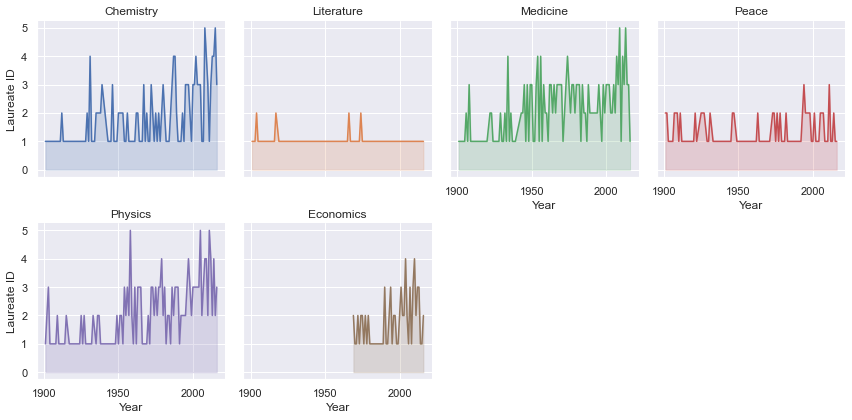

In [73]:
year_cat=nobel.groupby(['Year','Category'])['Laureate ID'].count().reset_index()
year_cat
g = sns.FacetGrid(year_cat, col='Category', hue='Category', col_wrap=4, )
g = g.map(plt.plot, 'Year', 'Laureate ID')
g = g.map(plt.fill_between, 'Year', 'Laureate ID', alpha=0.2).set_titles("{col_name} Category")
g = g.set_titles("{col_name}")
# plt.subplots_adjust(top=0.92)
#g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')
 
plt.show()

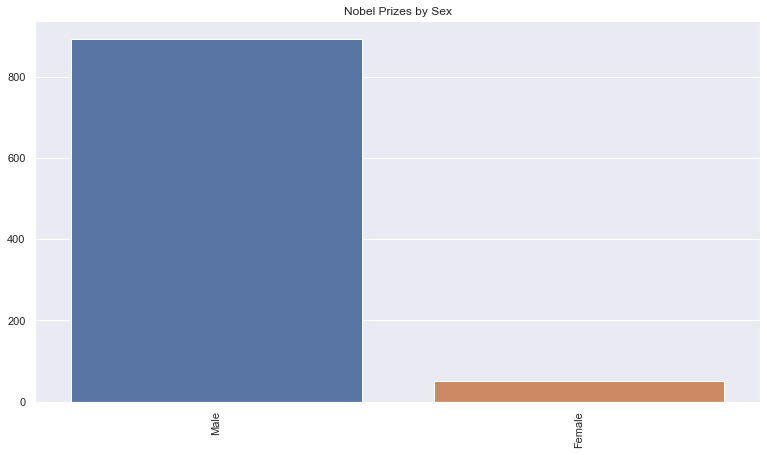

In [74]:
# and setting the size of all plots.

plt.rcParams['figure.figsize'] = [13, 7]
sns.barplot(x=sex.index,y=sex.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Sex')
plt.show()

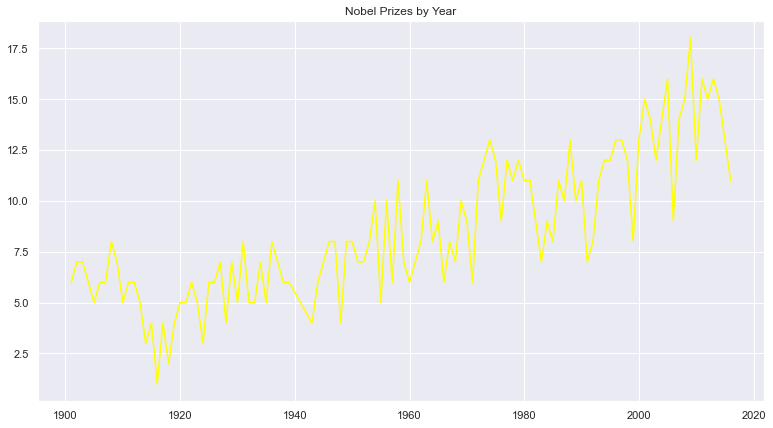

In [75]:
year=nobel['Year'].value_counts()

sns.lineplot(x=year.index,y=year.values,color='yellow')

plt.xticks(rotation=0)
plt.title('Nobel Prizes by Year')
plt.show()

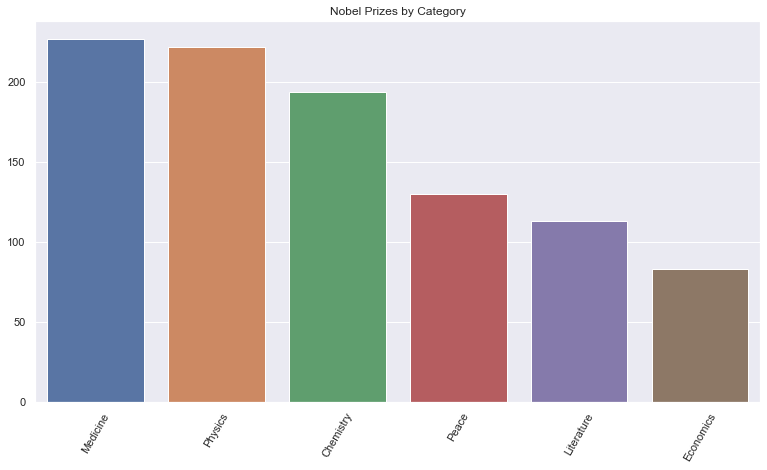

In [76]:
sns.barplot(x=cat.index,y=cat.values)
plt.xticks(rotation=60)
plt.title('Nobel Prizes by Category')
plt.show()

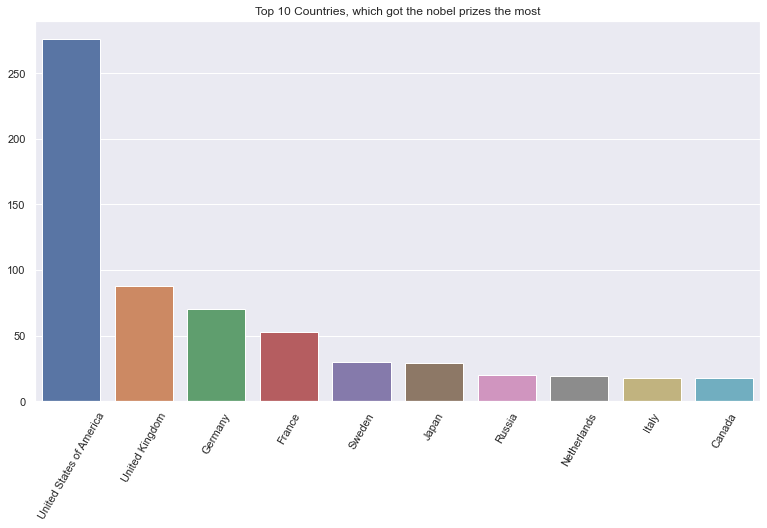

In [77]:
sns.barplot(x=ctry.index,y=ctry.values)
plt.xticks(rotation=60)
plt.title('Top 10 Countries, which got the nobel prizes the most')
plt.show()

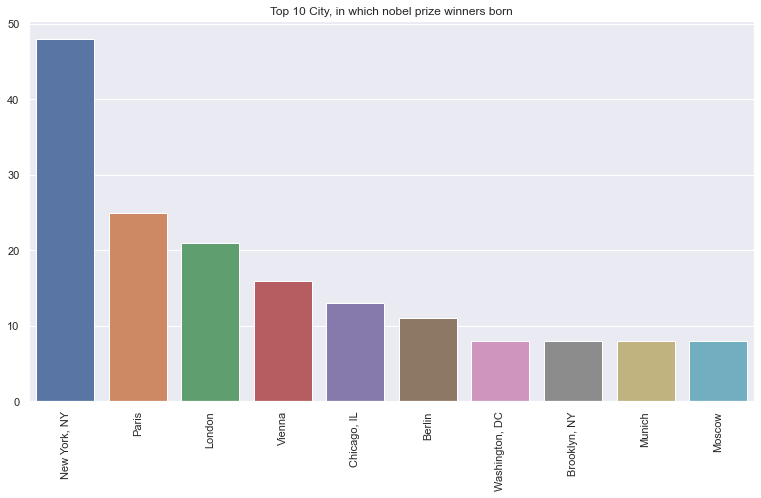

In [78]:
city=nobel['Birth City'].value_counts().head(10)
sns.barplot(x=city.index,y=city.values)
plt.xticks(rotation=90)
plt.title('Top 10 City, in which nobel prize winners born')
plt.show()

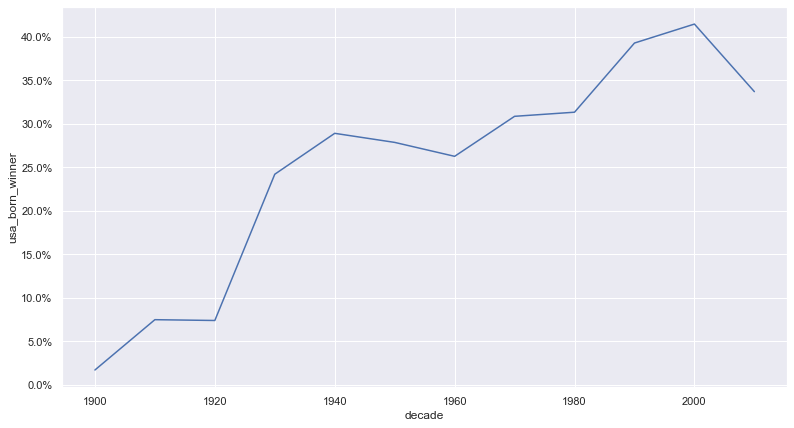

In [79]:
# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade',y='usa_born_winner')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [80]:
female=nobel[nobel['Sex']=="Female"].nsmallest(1,'Year')

female[['Year','Category','Full Name','Prize']]

,Year,Category,Full Name,Prize
19,1903,Physics,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903


In [81]:
nobel['female_winner'] = np.where(nobel['Sex']=="Female", True, False)

prop_female_winners = nobel.groupby(['decade','Category'],as_index=False)['female_winner'].mean()


ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

KeyError: 'decade'

In [82]:
nobel['male_winner'] = np.where(nobel['Sex']=="Male", True, False)

prop_female_winners = nobel.groupby(['decade','Category'],as_index=False)['male_winner'].mean()


ax = sns.lineplot(x='decade', y='male_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

KeyError: 'decade'

In [83]:
repeat=nobel.groupby(['Category','Full Name']).filter(lambda group : len(group)>=2)
#repeat[repeat[['Year','Category','Full Name','Birth Country','Sex']].groupby(['Year','Category'])['Full Name'].nunique().reset_index()]>=2

In [84]:
nobel['Birth Year'] = nobel['Birth Date'].str[0:4]
nobel['Birth Year'] = nobel['Birth Year'].replace(to_replace="nan", value=0)
nobel['Birth Year'] = nobel['Birth Year'].apply(pd.to_numeric)

In [85]:
nobel['Age']=nobel['Year']- nobel['Birth Year']

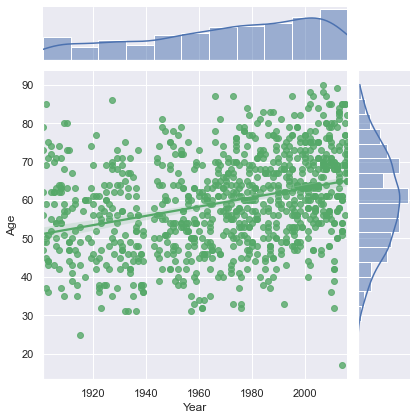

In [86]:
sns.jointplot(x="Year",
        y="Age",
        kind='reg',
        data=nobel,
             joint_kws=dict(color='g'),
            
        )

plt.show()


In [87]:
nobel['D Year'] = nobel['Death Date'].str[0:4]
nobel['D Year'] = nobel['D Year'].replace(to_replace="nan", value=0)
nobel['D Year'] = nobel['D Year'].apply(pd.to_numeric)

In [88]:
nobel['lifespan']=nobel['D Year']- nobel['Birth Year']

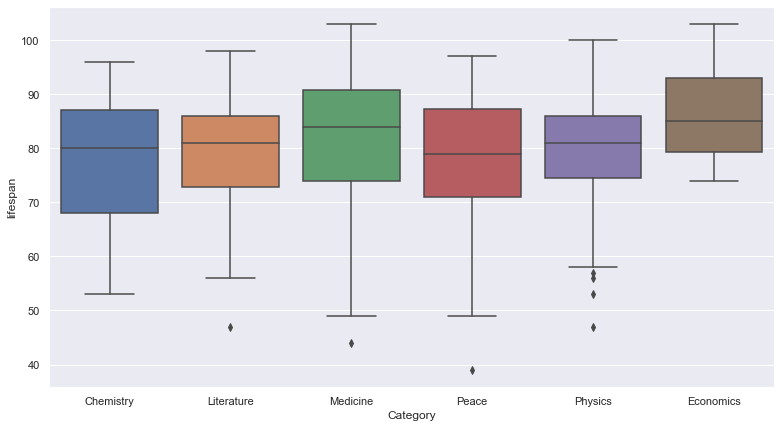

In [89]:
sns.boxplot(data=nobel,
         x='Category',
         y='lifespan')

plt.show()

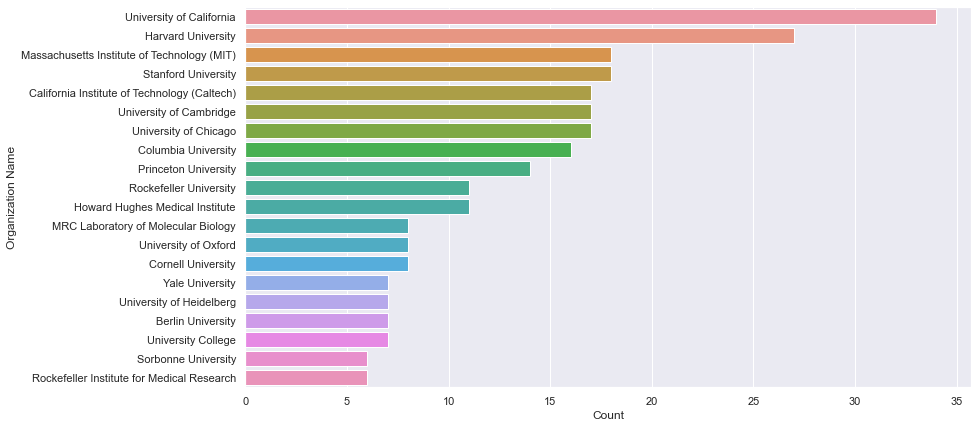

In [90]:
org = nobel['Organization Name'].value_counts().reset_index().head(20)

sns.barplot(x='Organization Name',y='index',data=org)
plt.xticks(rotation=0)
plt.ylabel('Organization Name')
plt.xlabel('Count')
plt.show()

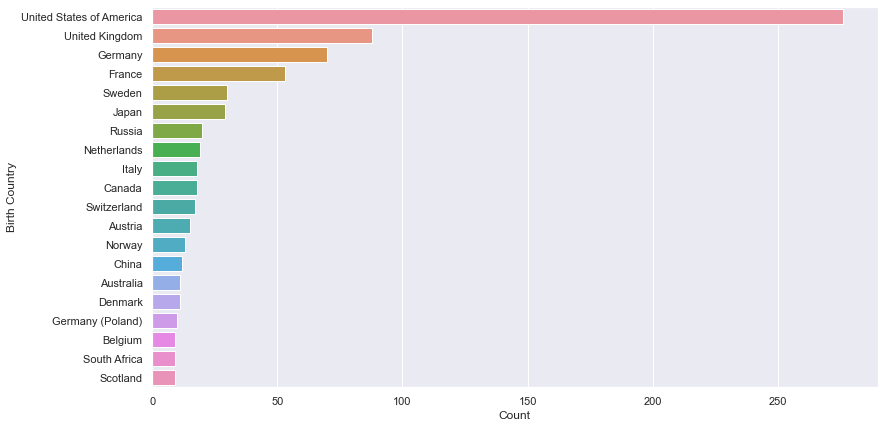

In [91]:
org = nobel['Birth Country'].value_counts().reset_index().head(20)

sns.barplot(x='Birth Country',y='index',data=org)
plt.xticks(rotation=0)
plt.ylabel('Birth Country')
plt.xlabel('Count')
plt.show()

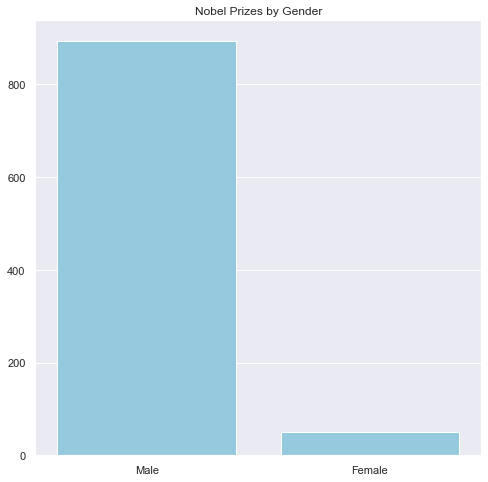

In [92]:
# and setting the size of all plots.

plt.rcParams['figure.figsize'] = [8, 8]
sns.barplot(x=sex.index,y=sex.values,color='skyblue')
plt.xticks(rotation=0)
plt.title('Nobel Prizes by Gender')


#plt.bar(X,Y,1,color="blue")
#plt.bar(XX,YY,1,color="yellow")
#color = ['pink', 'skyblue']

plt.show()